In [6]:
import numpy as np
import math
import scipy.constants
import matplotlib.pyplot as plt

In [53]:
class Ruku4:
    global y
    global func
   
    ## Evaluate the function at different points ##
    def eval_func(self, calc_func, x_val, y_vals):
        calc_func1=np.array([])
        x1=x_val
        for i in range(len(y_vals)):
            exec(f'x{i+2}=y_vals[i]')
        #x1=x_val/1000 
        #x2=y_vals[0]/(1.989*1e30)
        #x3=y_vals[1]/1e18
        for i in calc_func:
            evaled=eval(i)
            calc_func1=np.append(calc_func1,evaled)
        return(calc_func1)

    ## Checks If some inputs are zero or infinity and corrects accordingly ##
    def check_values(self,x_in,y_ins):
        with np.errstate(divide='ignore', invalid='ignore'):
            if x_in==0:
                x_in=1e-15
            for num in range(len(y_ins)):
                if y_ins[num]==0:
                    y_ins[num]==1e-16
                elif y_ins[num]==np.inf:
                    y_ins[num]==1e16
        return x_in,y_ins
    
    ## Return the slopes at different points ##
    def find_slopes(self, calc_func, h, x_in, y_ins):
        x_in,y_ins=self.check_values(x_in,y_ins)
        k1=h*self.eval_func(calc_func,x_val=x_in,y_vals=y_ins)
        k2=h*self.eval_func(calc_func,x_val=x_in+h/2,y_vals=y_ins+k1/2)
        k3=h*self.eval_func(calc_func,x_val=x_in+h/2,y_vals=y_ins+k2/2)
        k4=h*self.eval_func(calc_func,x_val=x_in+h,y_vals=y_ins+k3)
        return k1,k2,k3,k4
 
    ## Finds the location of the decimal point ##
    def decide_your_decimal(self,h,x_fin):
        if len(str(x_fin))-str(x_fin).find('.')-1>len(str(h))-str(h).find('.')-1:
            dec=len(str(x_fin))-str(x_fin).find('.')-1
        else:
            dec=len(str(h))-str(h).find('.')-1
        return dec
    
    def ruku4_calc(self,calc_func,h,x,y):
        k1,k2,k3,k4=self.find_slopes(calc_func,h,x,y)
        y=y+(k1+2*k2+2*k3+k4)/6
        return y 
    
    ## Runge Kutta 4th Order Method ##             
    def Ruku4(self, function, h, x_in, x_fin, y_ins, x_req=0, Integrate=False, full_output=False):
        calc_func=function
        y=y_ins
        y_total=np.array([])
        dec=self.decide_your_decimal(h,x_fin)
        x=x_in
        for i in range(len(y)):
            exec(f'y_pt{i}=np.array([])')
        x_pt=np.array([])
        num=0
        while x<=x_fin:
            if x==x_req or x==x_fin or x==x_in or full_output:
                print('\nx = ',x, end=' ')
            for j in range(len(y)):
                print(', y{} = '.format(j),y[j], end=' ')
            
            y_half=self.ruku4_calc(calc_func,h/2,x,y)
            y_half=self.ruku4_calc(calc_func,h/2,x,y_half)
            y=self.ruku4_calc(calc_func,h,x,y)
            
            if np.sum(abs((y_half-y)/y))>1e-5:
                h=h/2
            if np.sum(abs((y_half-y)/y))<=1e-5:
                h=2*h
            y_total=np.append(y_total,y)
            
            for i in range(len(y)):
                exec(f'y_pt{i}=np.append(y_pt{i},y[i])') 
            
            x_pt=np.append(x_pt,x)
            num=num+1
            x=x+h
        
        fig, ax = plt.subplots(len(y))
        fig.subplots_adjust(top=4, bottom=2, left=0, right=1, hspace=0.25)
        for i in range(len(y)):
            exec(f'ax[i].plot(x_pt, y_pt{i},color=(1,0.5,0), alpha=1)')
            exec(f'ax[i].set_title("Y{i} vs X")')
            exec(f'ax[i].set_xlabel("X")')
            exec(f'ax[i].set_ylabel("Y{i}")')
        
        for i,j in zip(function,range(len(function))):
            if Integrate == True:
                print('\nNumerical Integration ' + i + ' is ' , y_total[-(j+1)]-y_ins[0])


x =  0 , y0 =  0 , y1 =  1 
x =  0.005 , y0 =  4.999958333490583e-05 , y1 =  1.0099998333342013 
x =  0.0075 , y0 =  8.749919271128115e-05 , y1 =  1.0149996875016762 
x =  0.008749999999999999 , y0 =  0.00010937390788169397 , y1 =  1.0174995911481453 
x =  0.009375 , y0 =  0.00012109248545814314 , y1 =  1.0187495361355303 
x =  0.0096875 , y0 =  0.00012714707815700418 , y1 =  1.019374506798195 
x =  0.00984375 , y0 =  0.00013022320033985273 , y1 =  1.0196869916565123 
x =  0.009921875 , y0 =  0.00013177346787107986 , y1 =  1.01984323396551 
x =  0.0099609375 , y0 =  0.0001325516532442926 , y1 =  1.0199213550897301 
x =  0.0100390625 , y0 =  0.00013294150883250277 , y1 =  1.0199604156442408 
x =  0.010078124999999999 , y0 =  0.0001337288490195957 , y1 =  1.0200385366767308 
x =  0.010156249999999999 , y0 =  0.0001341232820138502 , y1 =  1.0200775971852871 
x =  0.010195312499999998 , y0 =  0.00013491977700401088 , y1 =  1.0201557181249745 
x =  0.010273437499999998 , y0 =  0.0001353187

x =  0.01882812499999997 , y0 =  0.0002601377334670961 , y1 =  1.0287485289818714 
x =  0.01898437499999997 , y0 =  0.00026161164504162214 , y1 =  1.028826640077156 
x =  0.01906249999999997 , y0 =  0.00026458998027857817 , y1 =  1.0289828616888796 
x =  0.01921874999999997 , y0 =  0.0002660821991004117 , y1 =  1.029060972436571 
x =  0.019296874999999967 , y0 =  0.00026909714869547785 , y1 =  1.0292171933459566 
x =  0.019453124999999967 , y0 =  0.0002706076746826489 , y1 =  1.0292953037417636 
x =  0.019531249999999965 , y0 =  0.000273659238470209 , y1 =  1.0294515239402298 
x =  0.019687499999999965 , y0 =  0.0002751880715397419 , y1 =  1.0295296339798619 
x =  0.019765624999999964 , y0 =  0.00027827624935216857 , y1 =  1.029685853458827 
x =  0.019921874999999964 , y0 =  0.000279823389420082 , y1 =  1.0297639631379936 
x =  0.019999999999999962 , y0 =  0.0002829481810877366 , y1 =  1.0299201818888764 
x =  0.020156249999999962 , y0 =  0.0002845136280690436 , y1 =  1.029998291203286

x =  0.030781249999999892 , y0 =  0.0005572214578854494 , y1 =  1.0406978903288833 
x =  0.030937499999999892 , y0 =  0.0005596289136196357 , y1 =  1.0407759782266575 
x =  0.03101562499999989 , y0 =  0.0005644743280773486 , y1 =  1.0409321530786955 
x =  0.03117187499999989 , y0 =  0.0005669000855962855 , y1 =  1.0410102404100774 
x =  0.03124999999999989 , y0 =  0.0005717821034015264 , y1 =  1.041166414122182 
x =  0.031406249999999886 , y0 =  0.000574226162571963 , y1 =  1.0412445008828821 
x =  0.031484374999999884 , y0 =  0.0005791447834565547 , y1 =  1.0414006734464742 
x =  0.03164062499999988 , y0 =  0.0005816071441442348 , y1 =  1.0414787596322035 
x =  0.03171874999999988 , y0 =  0.0005865623678379893 , y1 =  1.0416349310387043 
x =  0.031874999999999876 , y0 =  0.0005890430299076514 , y1 =  1.0417130166451731 
x =  0.031953124999999874 , y0 =  0.0005940348561383702 , y1 =  1.0418691868860042 
x =  0.03210937499999987 , y0 =  0.0005965338194537474 , y1 =  1.0419472719089231 


x =  0.053203124999999726 , y0 =  0.0014981587833151325 , y1 =  1.0630213514262044 
x =  0.05351562499999973 , y0 =  0.0015064800401237482 , y1 =  1.0631773796901038 
x =  0.05367187499999972 , y0 =  0.0015232444494981672 , y1 =  1.0634894296921606 
x =  0.053984374999999724 , y0 =  0.0015316388436386068 , y1 =  1.0636454540383293 
x =  0.05414062499999972 , y0 =  0.0015485495246043402 , y1 =  1.0639574961477867 
x =  0.05445312499999972 , y0 =  0.0015570170542321324 , y1 =  1.0641135165419418 
x =  0.05460937499999972 , y0 =  0.0015740740030734544 , y1 =  1.0644255506902356 
x =  0.05492187499999972 , y0 =  0.001582614666328058 , y1 =  1.0645815670980954 
x =  0.055078124999999714 , y0 =  0.0015998178792971042 , y1 =  1.0648935932166637 
x =  0.055390624999999714 , y0 =  0.0016084316743019086 , y1 =  1.0650496056039473 
x =  0.05554687499999971 , y0 =  0.001625781147618676 , y1 =  1.0653616236242296 
x =  0.05585937499999971 , y0 =  0.0016344680724810017 , y1 =  1.065517631956657 
x =

x =  0.09164062499999939 , y0 =  0.004246268584508183 , y1 =  1.100888187135238 
x =  0.09195312499999939 , y0 =  0.004303658331519895 , y1 =  1.101510546681017 
x =  0.09257812499999939 , y0 =  0.004332401826865661 , y1 =  1.1018217219703326 
x =  0.09289062499999938 , y0 =  0.00439037501064597 , y1 =  1.1024440274397338 
x =  0.09351562499999938 , y0 =  0.004419410220151318 , y1 =  1.1027551756452794 
x =  0.09382812499999937 , y0 =  0.004477966789747235 , y1 =  1.1033774264913547 
x =  0.09445312499999937 , y0 =  0.0045072936878929395 , y1 =  1.1036885473396603 
x =  0.09476562499999937 , y0 =  0.004566433591838734 , y1 =  1.1043107430155097 
x =  0.09539062499999937 , y0 =  0.004596052152849203 , y1 =  1.1046218362331293 
x =  0.09570312499999936 , y0 =  0.004655775339166447 , y1 =  1.105243976191901 
x =  0.09632812499999936 , y0 =  0.004685685537009743 , y1 =  1.105555041505413 
x =  0.09664062499999936 , y0 =  0.004745991953207359 , y1 =  1.1061771252003043 
x =  0.0972656249999

x =  0.14789062499999883 , y0 =  0.01096512119343817 , y1 =  1.156727888727088 
x =  0.14914062499999883 , y0 =  0.011057409438279313 , y1 =  1.157346037469017 
x =  0.14976562499999882 , y0 =  0.011243917407574225 , y1 =  1.1585820449827235 
x =  0.15101562499999882 , y0 =  0.011337364518401985 , y1 =  1.1592000195977057 
x =  0.1516406249999988 , y0 =  0.011526189672581236 , y1 =  1.160435675236506 
x =  0.1528906249999988 , y0 =  0.01162079532087071 , y1 =  1.1610534735519746 
x =  0.1535156249999988 , y0 =  0.01181193699609606 , y1 =  1.162288772971768 
x =  0.1547656249999988 , y0 =  0.01190770084924936 , y1 =  1.1629063928157768 
x =  0.15539062499999878 , y0 =  0.012101158373538555 , y1 =  1.1641413316737148 
x =  0.15664062499999878 , y0 =  0.012198080094885986 , y1 =  1.1647587708749447 
x =  0.15726562499999877 , y0 =  0.012393852788115117 , y1 =  1.165993344829447 
x =  0.15851562499999877 , y0 =  0.012491932036916353 , y1 =  1.166610601217214 
x =  0.15914062499999876 , y0 

x =  0.2435156249999982 , y0 =  0.029591983052360864 , y1 =  1.250484017331352 
x =  0.2447656249999982 , y0 =  0.029742870099168074 , y1 =  1.251090530386768 
x =  0.2453906249999982 , y0 =  0.030046539162105354 , y1 =  1.2523030834358198 
x =  0.2466406249999982 , y0 =  0.030198563154994074 , y1 =  1.252909312512053 
x =  0.24726562499999818 , y0 =  0.03050450521977306 , y1 =  1.2541212940505049 
x =  0.24851562499999819 , y0 =  0.030657665624284097 , y1 =  1.2547272370162816 
x =  0.24914062499999817 , y0 =  0.030965879615327527 , y1 =  1.2559386427832626 
x =  0.25039062499999815 , y0 =  0.031120175893006495 , y1 =  1.2565442975083154 
x =  0.25101562499999813 , y0 =  0.031430660726749875 , y1 =  1.2577551232449782 
x =  0.2522656249999981 , y0 =  0.03158609233514908 , y1 =  1.2583604876000527 
x =  0.2528906249999981 , y0 =  0.03189884692004449 , y1 =  1.2595707290495892 
x =  0.25414062499999807 , y0 =  0.03205541331272484 , y1 =  1.260175800906452 
x =  0.25476562499999805 , y0 

x =  0.4291406249999966 , y0 =  0.09020472576654234 , y1 =  1.42367266762187 
x =  0.4303906249999966 , y0 =  0.09124779008331454 , y1 =  1.4259446741306347 
x =  0.4328906249999966 , y0 =  0.09177003224382707 , y1 =  1.4270803514273755 
x =  0.43414062499999656 , y0 =  0.09282160923100097 , y1 =  1.4293484304790929 
x =  0.43664062499999656 , y0 =  0.09334810649938385 , y1 =  1.4304821413871003 
x =  0.43789062499999654 , y0 =  0.09440818136917538 , y1 =  1.432746261086946 
x =  0.44039062499999654 , y0 =  0.09493892634156946 , y1 =  1.4338779896634288 
x =  0.4416406249999965 , y0 =  0.09600748418669325 , y1 =  1.4361381181722568 
x =  0.4441406249999965 , y0 =  0.0965424693995061 , y1 =  1.4372678485023007 
x =  0.4453906249999965 , y0 =  0.09761949519338504 , y1 =  1.4395239540370912 
x =  0.4478906249999965 , y0 =  0.09815871312339594 , y1 =  1.440651670233882 
x =  0.44914062499999646 , y0 =  0.09924419172037258 , y1 =  1.442903721068188 
x =  0.45164062499999647 , y0 =  0.099787

x =  0.7678906249999938 , y0 =  0.2786737692673948 , y1 =  1.7001956504970126 
x =  0.7703906249999938 , y0 =  0.28215584373705516 , y1 =  1.7037838401944032 
x =  0.7753906249999938 , y0 =  0.2838991235916139 , y1 =  1.7055757587454212 
x =  0.7778906249999937 , y0 =  0.2874080112988254 , y1 =  1.7091377322117598 
x =  0.7828906249999937 , y0 =  0.2891646813870068 , y1 =  1.7109165258889696 
x =  0.7853906249999937 , y0 =  0.2927001849577611 , y1 =  1.714452082764188 
x =  0.7903906249999937 , y0 =  0.2944701464673358 , y1 =  1.7162176515109142 
x =  0.7928906249999936 , y0 =  0.29803206703048934 , y1 =  1.7197265929208703 
x =  0.7978906249999936 , y0 =  0.2998152204015892 , y1 =  1.7214788374243366 
x =  0.8003906249999936 , y0 =  0.3034033576000494 , y1 =  1.7249609659920013 
x =  0.8053906249999936 , y0 =  0.3051996025307674 , y1 =  1.7266997876889163 
x =  0.8078906249999935 , y0 =  0.30881375453276294 , y1 =  1.7301549075454759 
x =  0.8128906249999935 , y0 =  0.3106229899847954

x =  1.4528906249999893 , y0 =  0.8758093382248409 , y1 =  1.9968317806489884 
x =  1.4578906249999892 , y0 =  0.8857456260172146 , y1 =  1.9979584356881477 
x =  1.4678906249999892 , y0 =  0.8907151782351183 , y1 =  1.9985093428221092 
x =  1.4728906249999891 , y0 =  0.9006672474079256 , y1 =  1.9994868323871666 
x =  1.4828906249999891 , y0 =  0.9056445038588149 , y1 =  1.9999631370573108 
x =  1.487890624999989 , y0 =  0.915610115238477 , y1 =  2.0007912412172377 
x =  1.497890624999989 , y0 =  0.9205939560606483 , y1 =  2.0011928362570233 
x =  1.502890624999989 , y0 =  0.9305708674266469 , y1 =  2.0018713686918774 
x =  1.512890624999989 , y0 =  0.9355601712769405 , y1 =  2.002198163744114 
x =  1.5178906249999888 , y0 =  0.9455461378663078 , y1 =  2.0027269717869602 
x =  1.5278906249999888 , y0 =  0.9505397821724059 , y1 =  2.0029788933241406 
x =  1.5328906249999887 , y0 =  0.9605325571847874 , y1 =  2.0033578579954 
x =  1.5428906249999887 , y0 =  0.9655294183977878 , y1 =  2.

x =  2.2978906249999795 , y0 =  1.6622784718566548 , y1 =  1.7488473996325828 
x =  2.3078906249999793 , y0 =  1.66600569243023 , y1 =  1.7455145667965952 
x =  2.312890624999979 , y0 =  1.6733762095227436 , y1 =  1.7387562649049138 
x =  2.322890624999979 , y0 =  1.677053020174024 , y1 =  1.7353679007935243 
x =  2.327890624999979 , y0 =  1.6843213373720383 , y1 =  1.7284998055860314 
x =  2.3378906249999787 , y0 =  1.6879469108341385 , y1 =  1.7250566725668708 
x =  2.3428906249999786 , y0 =  1.6951113927969474 , y1 =  1.7180803293360136 
x =  2.3528906249999784 , y0 =  1.6986849133311341 , y1 =  1.7145832020994853 
x =  2.3578906249999783 , y0 =  1.7057439480805208 , y1 =  1.7075001804930598 
x =  2.367890624999978 , y0 =  1.7092646116597492 , y1 =  1.7039498458780389 
x =  2.372890624999978 , y0 =  1.7162166109426749 , y1 =  1.696761739546025 
x =  2.3828906249999777 , y0 =  1.7196836254324923 , y1 =  1.693158996362822 
x =  2.3878906249999776 , y0 =  1.7265270250784472 , y1 =  1.6

x =  3.1328906249999617 , y0 =  1.9950494403445742 , y1 =  1.014335092281658 
x =  3.1378906249999616 , y0 =  1.9950864603916614 , y1 =  1.0043352024729526 
Numerical Integration np.sin(x1) is  0.9993352112934608

Numerical Integration np.cos(x1) is  1.9950924705269026


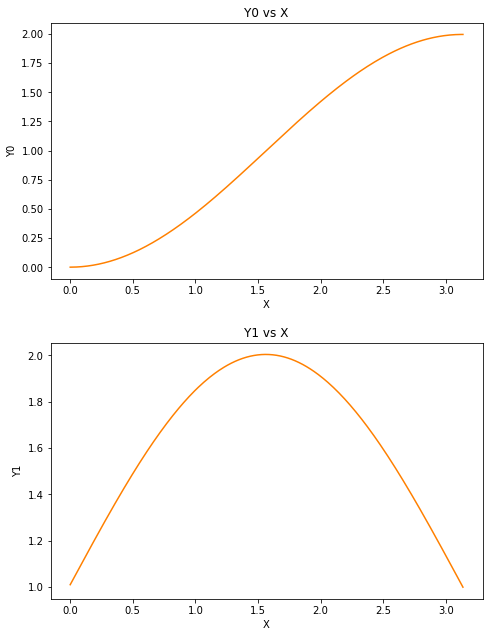

In [54]:
RuKu4=Ruku4()
RuKu4.Ruku4(function=['np.sin(x1)','np.cos(x1)'],h=0.01,x_in=0,x_fin=3.141,y_ins=[0,1], x_req=2,Integrate=True, full_output=True)